In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

In [2]:
train = pd.read_csv('/content/drive/MyDrive/taxi_train.csv')
test = pd.read_csv('/content/drive/MyDrive/taxi_test.csv')

In [3]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [8]:
test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

## trip_duration(target)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


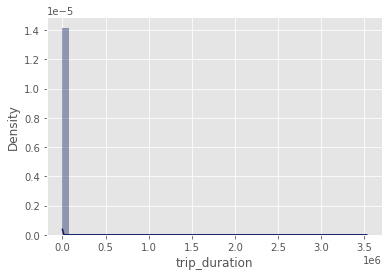

In [9]:
cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]

plt.style.use('ggplot')


sns.distplot(train['trip_duration'], color = cust_palt[0])


trip_duration의 분포가 한쪽으로 치우쳐져 있어서 log를 씌워주겠습니다.

In [10]:
train['log_trip_duration'] = train['trip_duration'].apply(lambda x : np.log1p(x))
train['log_trip_duration']

0          6.122493
1          6.498282
2          7.661527
3          6.063785
4          6.077642
             ...   
1458639    6.658011
1458640    6.486161
1458641    6.639876
1458642    5.924256
1458643    5.293305
Name: log_trip_duration, Length: 1458644, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


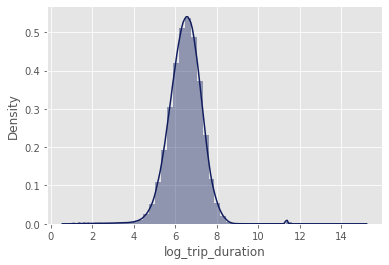

In [11]:
sns.distplot(train['log_trip_duration'], color = cust_palt[0])

로그를 씌워주니 정규분포에 근사한 모습을 확인할 수 있습니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


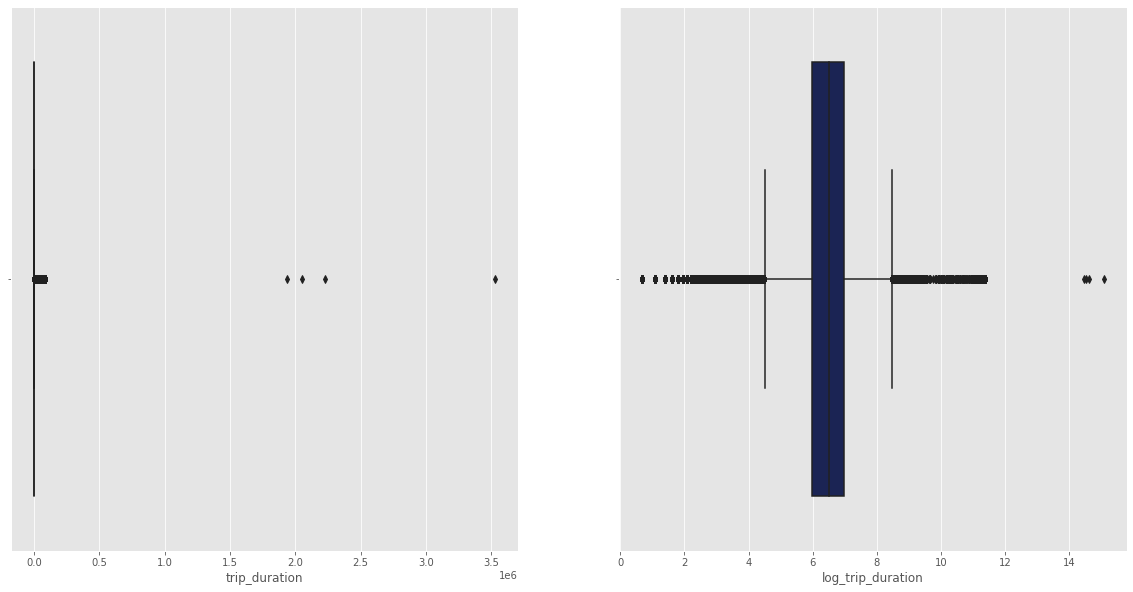

In [12]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), ncols = 2)

sns.boxplot(train['trip_duration'], color = cust_palt[0], ax = ax1)
sns.boxplot(train['log_trip_duration'], color = cust_palt[0], ax = ax2)

로그를씌워도 이상치가 남아있는 것을 볼 수 있습니다.

## 거리변수 구하기

> Geographical Distance(haversine)를 이용하여 거리를 구하겠습니다.




In [13]:
from math import *
from numba import cuda, jit, prange, vectorize, guvectorize
#numba
@jit(nopython=True)

def haversine1(lat1, lon1, lat2, lon2, R = 6371.0):
    
    R = R # 'km'를 나타내기위해 수를 지정해준다.
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1)*cos(lat2)*sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    distance = R * c
    return distance

#prange 병렬화
@jit(nopython=True, parallel=True)
def get_dist_p(la1,lo1,la2,lo2):
    n= len(la1)
#     output = np.zeros(n,dtype=np.float32)
    output = np.zeros(n)
    for i in prange(n):
        output[i]= haversine1(la1[i],lo1[i],la2[i],lo2[i])
    return output


train['distance'] = get_dist_p(np.array(train.pickup_latitude),
                                np.array(train.pickup_longitude),
                                np.array(train.dropoff_latitude),
                                np.array(train.dropoff_longitude))

test['distance'] = get_dist_p(np.array(test.pickup_latitude),
                                np.array(test.pickup_longitude),
                                np.array(test.dropoff_latitude),
                                np.array(test.dropoff_longitude))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [14]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,1.225080
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,6.049836
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,7.824606
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,1.092564


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


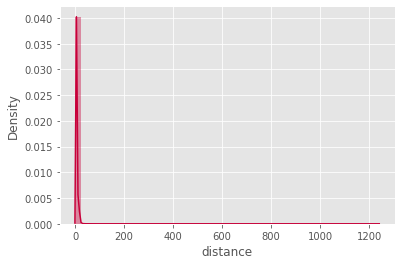

In [15]:
sns.distplot(train['distance'], color = cust_palt[1])

distance의 분포가 한쪽으로 치우져져있기때문에 log를 씌워주겠습니다.

In [16]:
train['log_distance'] = train['distance'].apply(lambda x : np.log1p(x))
test['log_distance'] = test['distance'].apply(lambda x : np.log1p(x))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


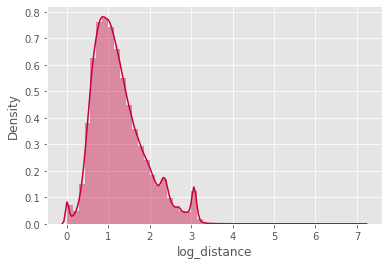

In [17]:
sns.distplot(train['log_distance'], color = cust_palt[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


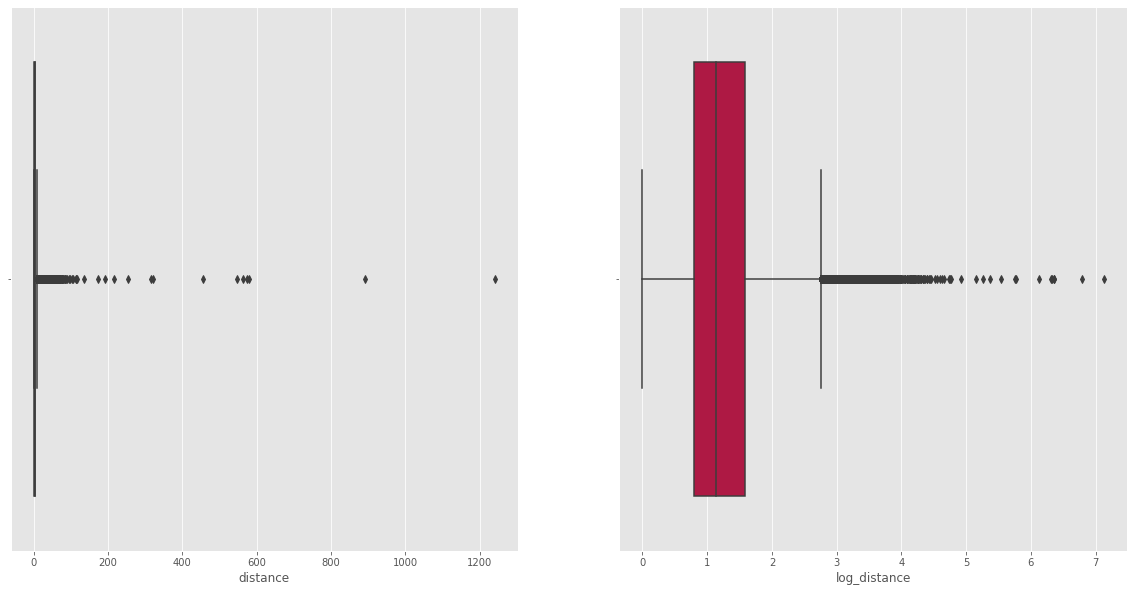

In [18]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,10), ncols = 2)
sns.boxplot(train['distance'], color = cust_palt[1], ax = ax1)
sns.boxplot(train['log_distance'], color = cust_palt[1], ax = ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


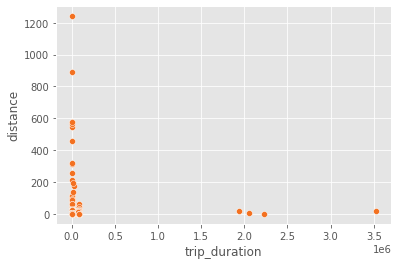

In [19]:
sns.scatterplot(train['trip_duration'], train['distance'], color = cust_palt[2])

이상치가 많은 것을 확인 할 수 있습니다.

거리와 시간변수를 통해 구할수있는 속력 변수를 사용하여 이상치를 제거하고자 합니다.

In [20]:
train['trip_duration_h'] = train['trip_duration'].apply(lambda x : x/3600)

In [21]:
train['velocity'] = train.apply(lambda x : x['distance'] / x['trip_duration_h'], axis = 1)

In [22]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,distance,log_distance,trip_duration_h,velocity
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,1.498521,0.915699,0.126389,11.856428
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,1.805507,1.031584,0.184167,9.803659
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,6.385098,1.999464,0.590000,10.822201
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,1.485498,0.910473,0.119167,12.465721
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,1.188588,0.783257,0.120833,9.836594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,1.225080,0.799793,0.216111,5.668751
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,6.049836,1.953004,0.181944,33.251005
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,7.824606,2.177544,0.212222,36.869870
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,1.092564,0.738390,0.103611,10.544853


In [23]:
train.velocity.describe()

count    1.458644e+06
mean     1.442321e+01
std      1.497752e+01
min      0.000000e+00
25%      9.121275e+00
50%      1.279198e+01
75%      1.784491e+01
max      9.274837e+03
Name: velocity, dtype: float64

위의 기술통계량을 보면 maximum값은 927k/h minimum값은 0으로 극단적인 값들을 제거해주기위해 iqr방법을 사용했습니다

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


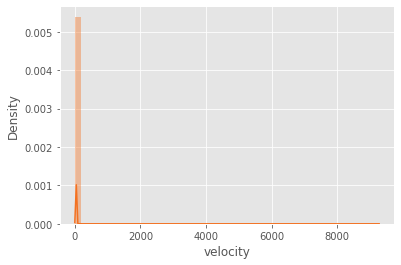

In [24]:
sns.distplot(train['velocity'], color = cust_palt[2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


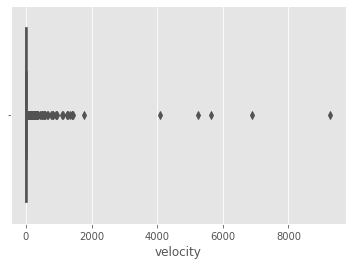

In [25]:
sns.boxplot(train['velocity'], color = cust_palt[2])

대부분의 택시들이 10km/h 내외의 속도로 다니고있지만 극단적인 값들이 존재합니다.

In [26]:
# IQR 방법 사용해서 이상치 제거해줬습니다.
velocity_q1 = np.percentile(train['velocity'], 25)
velocity_q3 = np.percentile(train['velocity'], 75)

velocity_IQR = velocity_q3 - velocity_q1

train = train[(train['velocity'] >= (velocity_q1 - (1.5 * velocity_IQR))) & (train['velocity'] <= (velocity_q3 + (1.5 * velocity_IQR)))]
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,distance,log_distance,trip_duration_h,velocity
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,1.498521,0.915699,0.126389,11.856428
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,1.805507,1.031584,0.184167,9.803659
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,6.385098,1.999464,0.590000,10.822201
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,1.485498,0.910473,0.119167,12.465721
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,1.188588,0.783257,0.120833,9.836594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,N,760,6.634633,3.537555,1.512388,0.211111,16.756840
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,N,414,6.028279,2.317448,1.199196,0.115000,20.151725
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,1.225080,0.799793,0.216111,5.668751
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,1.092564,0.738390,0.103611,10.544853


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


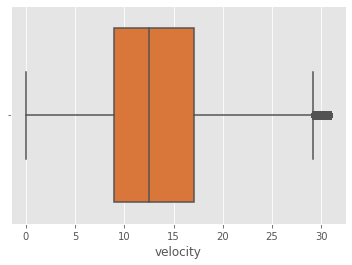

In [27]:
sns.boxplot(train['velocity'], color = cust_palt[2])

In [28]:
train = train.drop('velocity', axis = 1)

속력변수는 이상치제거에만 사용을하고 학습에는 쓰지 않을 것이기 때문에 제거해 줍니다.

## pickup_datetime

In [29]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['pickup_month'] = train['pickup_datetime'].dt.month
train['pickup_day'] = train['pickup_datetime'].dt.day
train['pickup_weekday'] = train['pickup_datetime'].dt.weekday
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_dayofweek'] = train['pickup_datetime'].dt.dayofweek # dt.weekday랑 같은것

test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)
test['pickup_month'] = test['pickup_datetime'].dt.month
test['pickup_day'] = test['pickup_datetime'].dt.day
test['pickup_weekday'] = test['pickup_datetime'].dt.weekday
test['pickup_hour'] = test['pickup_datetime'].dt.hour

In [30]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,distance,log_distance,trip_duration_h,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_dayofweek
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,1.498521,0.915699,0.126389,3,14,0,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,1.805507,1.031584,0.184167,6,12,6,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,6.385098,1.999464,0.590000,1,19,1,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,1.485498,0.910473,0.119167,4,6,2,19,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,1.188588,0.783257,0.120833,3,26,5,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,N,760,6.634633,3.537555,1.512388,0.211111,4,17,6,18,6
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,N,414,6.028279,2.317448,1.199196,0.115000,2,2,1,0,1
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,1.225080,0.799793,0.216111,4,8,4,13,4
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,1.092564,0.738390,0.103611,1,5,1,15,1


월에 따라서 택시 이용시간을 확인해 보겠습니다.

각 월마다 groupby를 하여 택시 용시간의 평균을 이용하여 확인해 보겠습니다.

In [31]:
trip_month = train.groupby(train['pickup_month']).trip_duration.mean()
trip_month

pickup_month
1     915.663779
2     915.210359
3     933.352243
4     960.234686
5     998.466691
6    1013.500514
Name: trip_duration, dtype: float64

Text(0, 0.5, 'trip_duration')

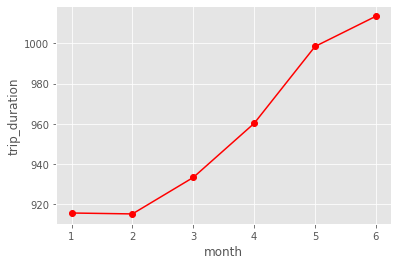

In [32]:
fig, ax = plt.subplots()
plt.plot(list(set(train.pickup_month.values)), trip_month, marker = 'o', color = 'r')
plt.xlabel('month')
plt.ylabel('trip_duration')

날이 따뜻해 질수록 택시 이용시간이 늘어나고 있습니다.
그렇다면 월마다 이용수는 어떤지 확인해 보겠습니다.

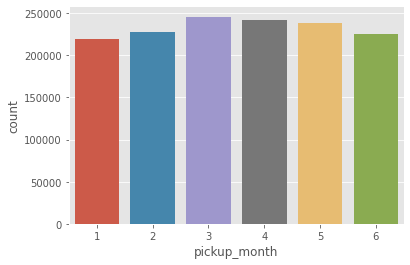

In [33]:
sns.countplot(data = train, x = 'pickup_month')

월마다 택시이용수에는 그렇게 차이가 있는것 같진 않습니다.

일에 따라서 택시 이용시간을 확인해 보겠습니다.

In [34]:
trip_day = train.groupby(train['pickup_day']).trip_duration.mean()

Text(0, 0.5, 'trip_duration')

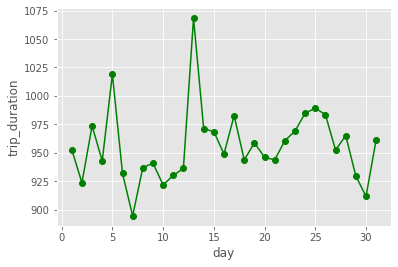

In [35]:
fig, ax = plt.subplots()
plt.plot(list(set(train.pickup_day.values)), trip_day, marker = 'o', color = 'g')
plt.xlabel('day')
plt.ylabel('trip_duration')

다음은 일에따라서 이용수를 확인해보겠습니다.

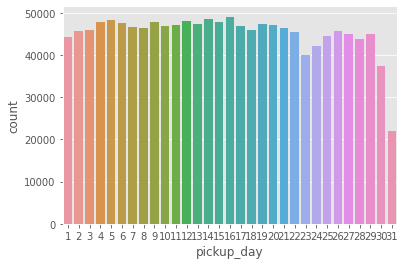

In [36]:
sns.countplot(data = train, x = 'pickup_day')

크게 눈에 띄게 차이나는 부분은 없는것 같습니다.
31일이 적은 이유는 31일이 있는달도 있고 없는달도 있기 때문인거 같습니다.

이번에는 시간대 별로 확인해 보겠습니다.

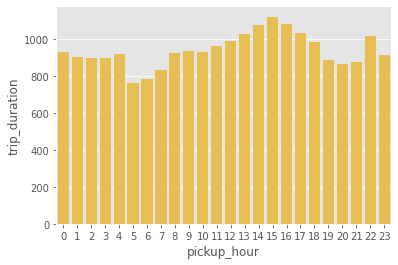

In [37]:
trip_hour = pd.DataFrame(train.groupby(train['pickup_hour']).trip_duration.mean())
sns.barplot(data = trip_hour, x = trip_hour.index, y = 'trip_duration', color = cust_palt[4])

In [38]:
import plotly.express as px
fig = px.line(trip_hour, x = trip_hour.index, y = 'trip_duration')
fig.show()

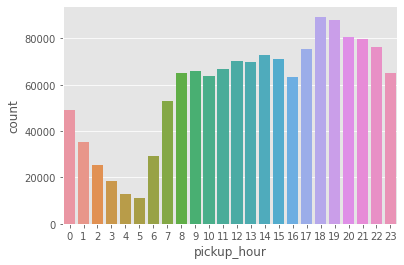

In [39]:
sns.countplot(data = train, x = 'pickup_hour')

택시 이용 수는 18시경에 많은반면, 택시를 탄 평균 시간은 15시경이 가장 높습니다.

마지막으로 요일별로 확인해 보겠습니다.

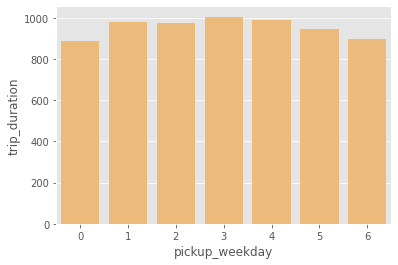

In [40]:
trip_weekday = pd.DataFrame(train.groupby(train['pickup_weekday']).trip_duration.mean())
sns.barplot(data = trip_weekday, x = trip_weekday.index, y = 'trip_duration', color = cust_palt[3])

평일과 주말이 차이가 있는지 궁금해졌습니다. 이를 확인해 보겠습니다.

In [41]:
train.loc[(train['pickup_weekday'] <= 4) , 'weekend'] = 0
train.loc[(train['pickup_weekday'] >= 5) , 'weekend'] = 1 
test.loc[(test['pickup_weekday'] <= 4) , 'weekend'] = 0
test.loc[(test['pickup_weekday'] >= 5) , 'weekend'] = 1 

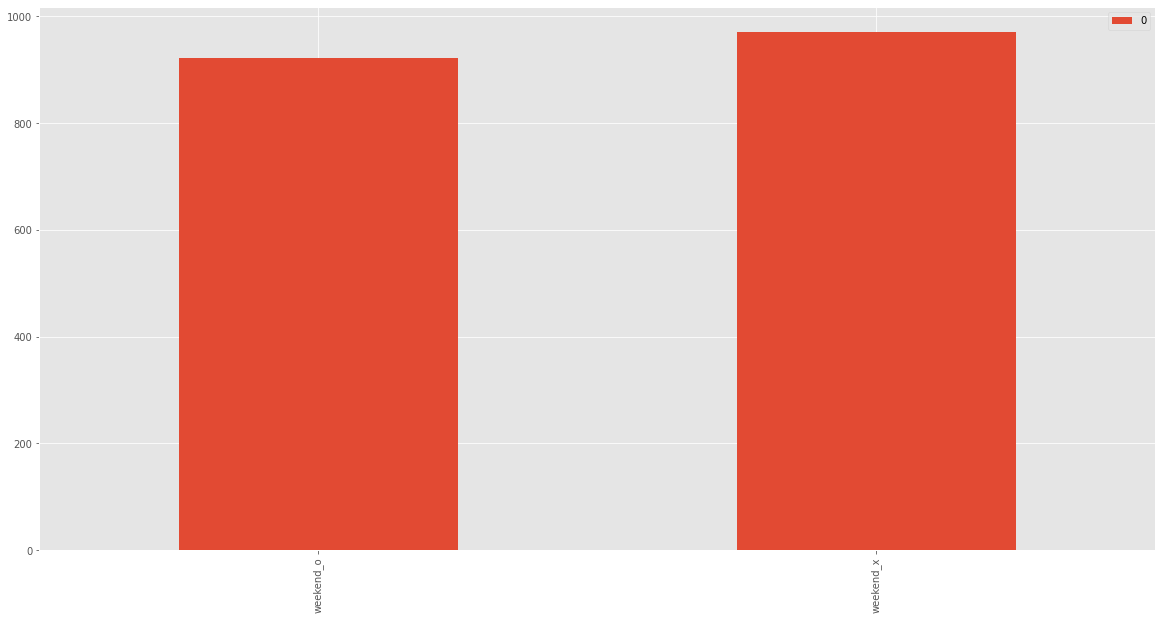

In [42]:
weekend_o = train[train['weekend'] == 1]['trip_duration'].mean()
weekend_x = train[train['weekend'] == 0]['trip_duration'].mean()
weekend = pd.DataFrame([weekend_o, weekend_x])
weekend.index = ['weekend_o', 'weekend_x']
weekend.plot(kind = 'bar', stacked = True, figsize = (20, 10))

In [43]:
!pip install plotly

## store_and_fwd_flag

In [44]:
import plotly.express as px
train.groupby('store_and_fwd_flag')['id'].count()


store_and_fwd_flag
N    1391407
Y       7580
Name: id, dtype: int64

In [45]:
px.pie(train, values = train.groupby('store_and_fwd_flag')['id'].count(), names = list(set(train['store_and_fwd_flag'].values)))

store_and_fwd_flag 가 문자형 변수 이기 때문에 숫자형 변수로 바꿔주겠습니다.

변수가 N과 Y 두가지로 이루어져있기 때문에 원핫인코딩 대신 라벨인코딩으로 바꿔주겠습니다.

In [46]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
labelencoder.fit_transform(train['store_and_fwd_flag'])
train['store_and_fwd_flag'] = labelencoder.fit_transform(train['store_and_fwd_flag'])
test['store_and_fwd_flag'] = labelencoder.fit_transform(test['store_and_fwd_flag'])

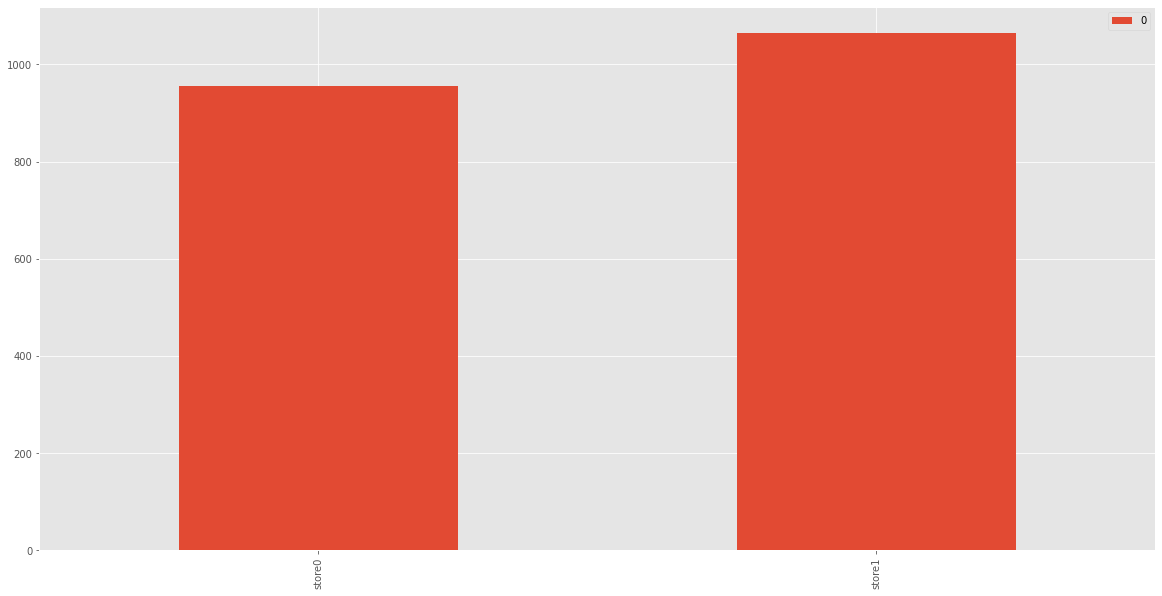

In [47]:
store0 = train[train['store_and_fwd_flag'] == 0]['trip_duration'].mean()
store1 = train[train['store_and_fwd_flag'] == 1]['trip_duration'].mean()
store = pd.DataFrame([store0, store1])
store.index = ['store0', 'store1']
store.plot(kind = 'bar', stacked = True, figsize = (20, 10))

## vendor_id

In [48]:
px.pie(train, values = train.groupby('vendor_id')['id'].count(), names = list(set(train['vendor_id'].values)))

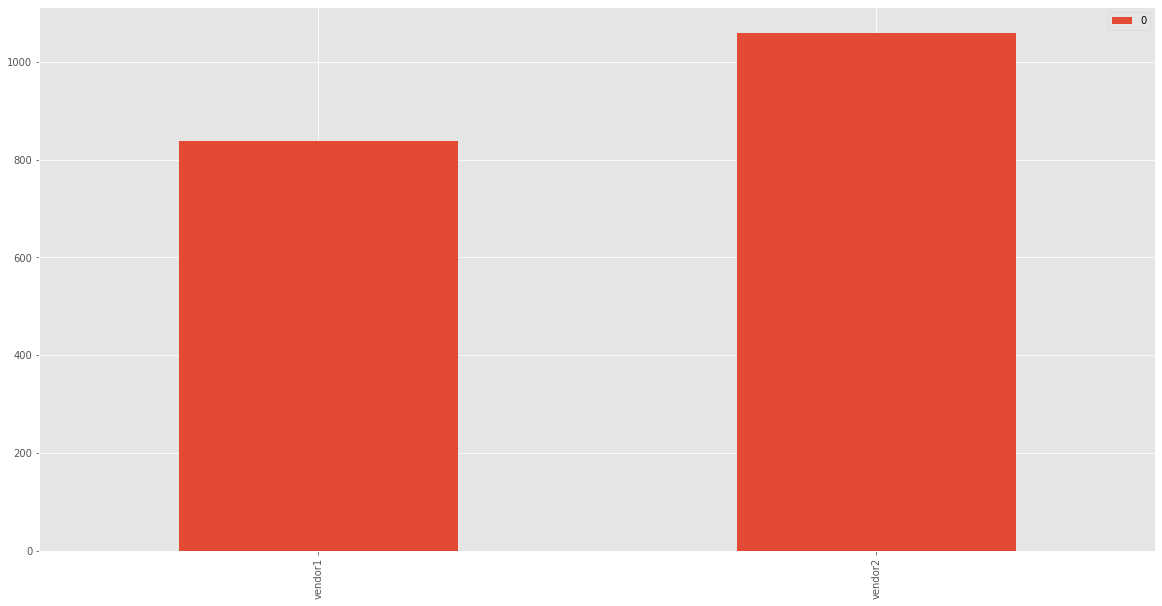

In [49]:
vendor1 = train[train['vendor_id'] == 1]['trip_duration'].mean()
vendor2 = train[train['vendor_id'] == 2]['trip_duration'].mean()
vendor = pd.DataFrame([vendor1, vendor2])
vendor.index = ['vendor1', 'vendor2']
vendor.plot(kind = 'bar', stacked = True, figsize = (20, 10))

vendor_id 의 값이 2인 데이터들의 trip_duration의 평균이 더 큰 것을 확인 할 수 있습니다.

## passenger_count

이번에는 승객수와 trip_duration의 관계를 살펴보겠습니다.

In [50]:
px.pie(train, values = train.groupby('passenger_count')['id'].count(), names = list(set(train['passenger_count'].values)))

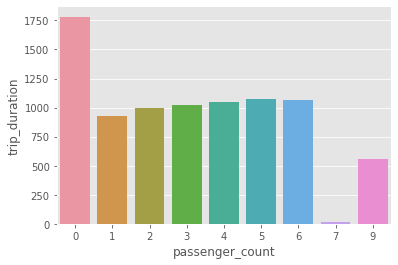

In [51]:
passenger = pd.DataFrame(train.groupby(train['passenger_count']).trip_duration.mean())
sns.barplot(data = passenger, x = passenger.index, y = 'trip_duration')

In [52]:
train.loc[train['passenger_count'] == 0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,distance,log_distance,trip_duration_h,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_dayofweek,weekend
62744,id3917283,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,-73.776367,40.645248,-73.776360,40.645260,0,85901,11.360962,0.001426,0.001425,23.861389,6,6,0,16,0,0.0
136519,id3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,0,4,1.609438,0.015301,0.015185,0.001111,1,1,4,5,4,0.0
194288,id2840829,2,2016-02-21 01:33:52,2016-02-21 01:36:27,0,-73.946243,40.772903,-73.946770,40.774841,0,155,5.049856,0.219993,0.198845,0.043056,2,21,6,1,6,1.0
217765,id3762593,1,2016-01-04 12:24:17,2016-01-04 13:01:48,0,-73.815224,40.700081,-73.950699,40.755222,0,2251,7.719574,12.958301,2.636074,0.625278,1,4,0,12,0,0.0
263809,id2154895,1,2016-05-23 23:37:37,2016-05-23 23:37:45,0,-73.861633,40.705029,-73.861633,40.705029,0,8,2.197225,0.000000,0.000000,0.002222,5,23,0,23,0,0.0
278290,id0796773,1,2016-02-07 17:23:48,2016-02-07 17:23:57,0,-73.954941,40.687866,-73.954742,40.687862,0,9,2.302585,0.016731,0.016592,0.002500,2,7,6,17,6,1.0
301600,id2091096,2,2016-01-01 23:52:46,2016-01-02 00:27:18,0,-73.993652,40.757046,-73.918869,40.757793,0,2072,7.636752,6.299397,1.987792,0.575556,1,1,4,23,4,0.0
303133,id0414625,2,2016-01-05 18:52:20,2016-01-05 18:52:35,0,-73.985291,40.738335,-73.985352,40.738361,0,15,2.772589,0.005938,0.005920,0.004167,1,5,1,18,1,0.0
337809,id0271506,2,2016-05-22 00:23:15,2016-05-22 00:23:56,0,-73.956718,40.777142,-73.956764,40.776958,0,41,3.737670,0.020722,0.020510,0.011389,5,22,6,0,6,1.0
375972,id3176865,2,2016-05-31 05:10:23,2016-05-31 05:10:38,0,-73.982468,40.727974,-73.982468,40.728001,0,15,2.772589,0.002969,0.002965,0.004167,5,31,1,5,1,0.0


## 위도경도 시각화

랜덤으로 1000개 샘플을 뽑아 어느지역에서 많이 타는지 확인을 해보려고 합니다

In [53]:
import folium

In [54]:
pickup = list(zip(train.pickup_latitude, train.pickup_longitude))
dropoff = list(zip(train.dropoff_latitude, train.dropoff_longitude))
print(pickup[0])

(40.76793670654297, -73.98215484619139)


In [55]:


m = folium.Map(location = pickup[0])
folium.Marker(
    location = pickup[0],
    icon = folium.Icon(color = 'blue', icon = 'circle')
).add_to(m)
m

In [56]:
number = np.random.choice(len(train), 1000, replace = False)

In [57]:
m = folium.Map(location = pickup[0])
for i in number  :
  folium.Marker(
      location = pickup[i],
      icon = folium.Icon(color = 'blue', icon = 'circle')
  ).add_to(m)
m

대부분이 manhattan 지역에 몰려있는 것을 확인할 수 있습니다.

이번엔 특정한 택시의 경로를 알아보겠습니다.

In [58]:
num = int(np.random.choice(len(train), 1))

m = folium.Map(location = pickup[num], zoom_start = 20)

loc = [pickup[num], dropoff[num]]
folium.PolyLine(
    loc, color = 'red', weight = 15, opacity = 0.8
).add_to(m)
m

가끔씩 공항에서 타는사람들 나오고

여러번 시행해서 확인해보면 대부분의 택시들은 manhattan내에서 돌아다닙니다.

## 상관계수

타겟과 변수들간의 상관계수를 확인해보겠습니다.

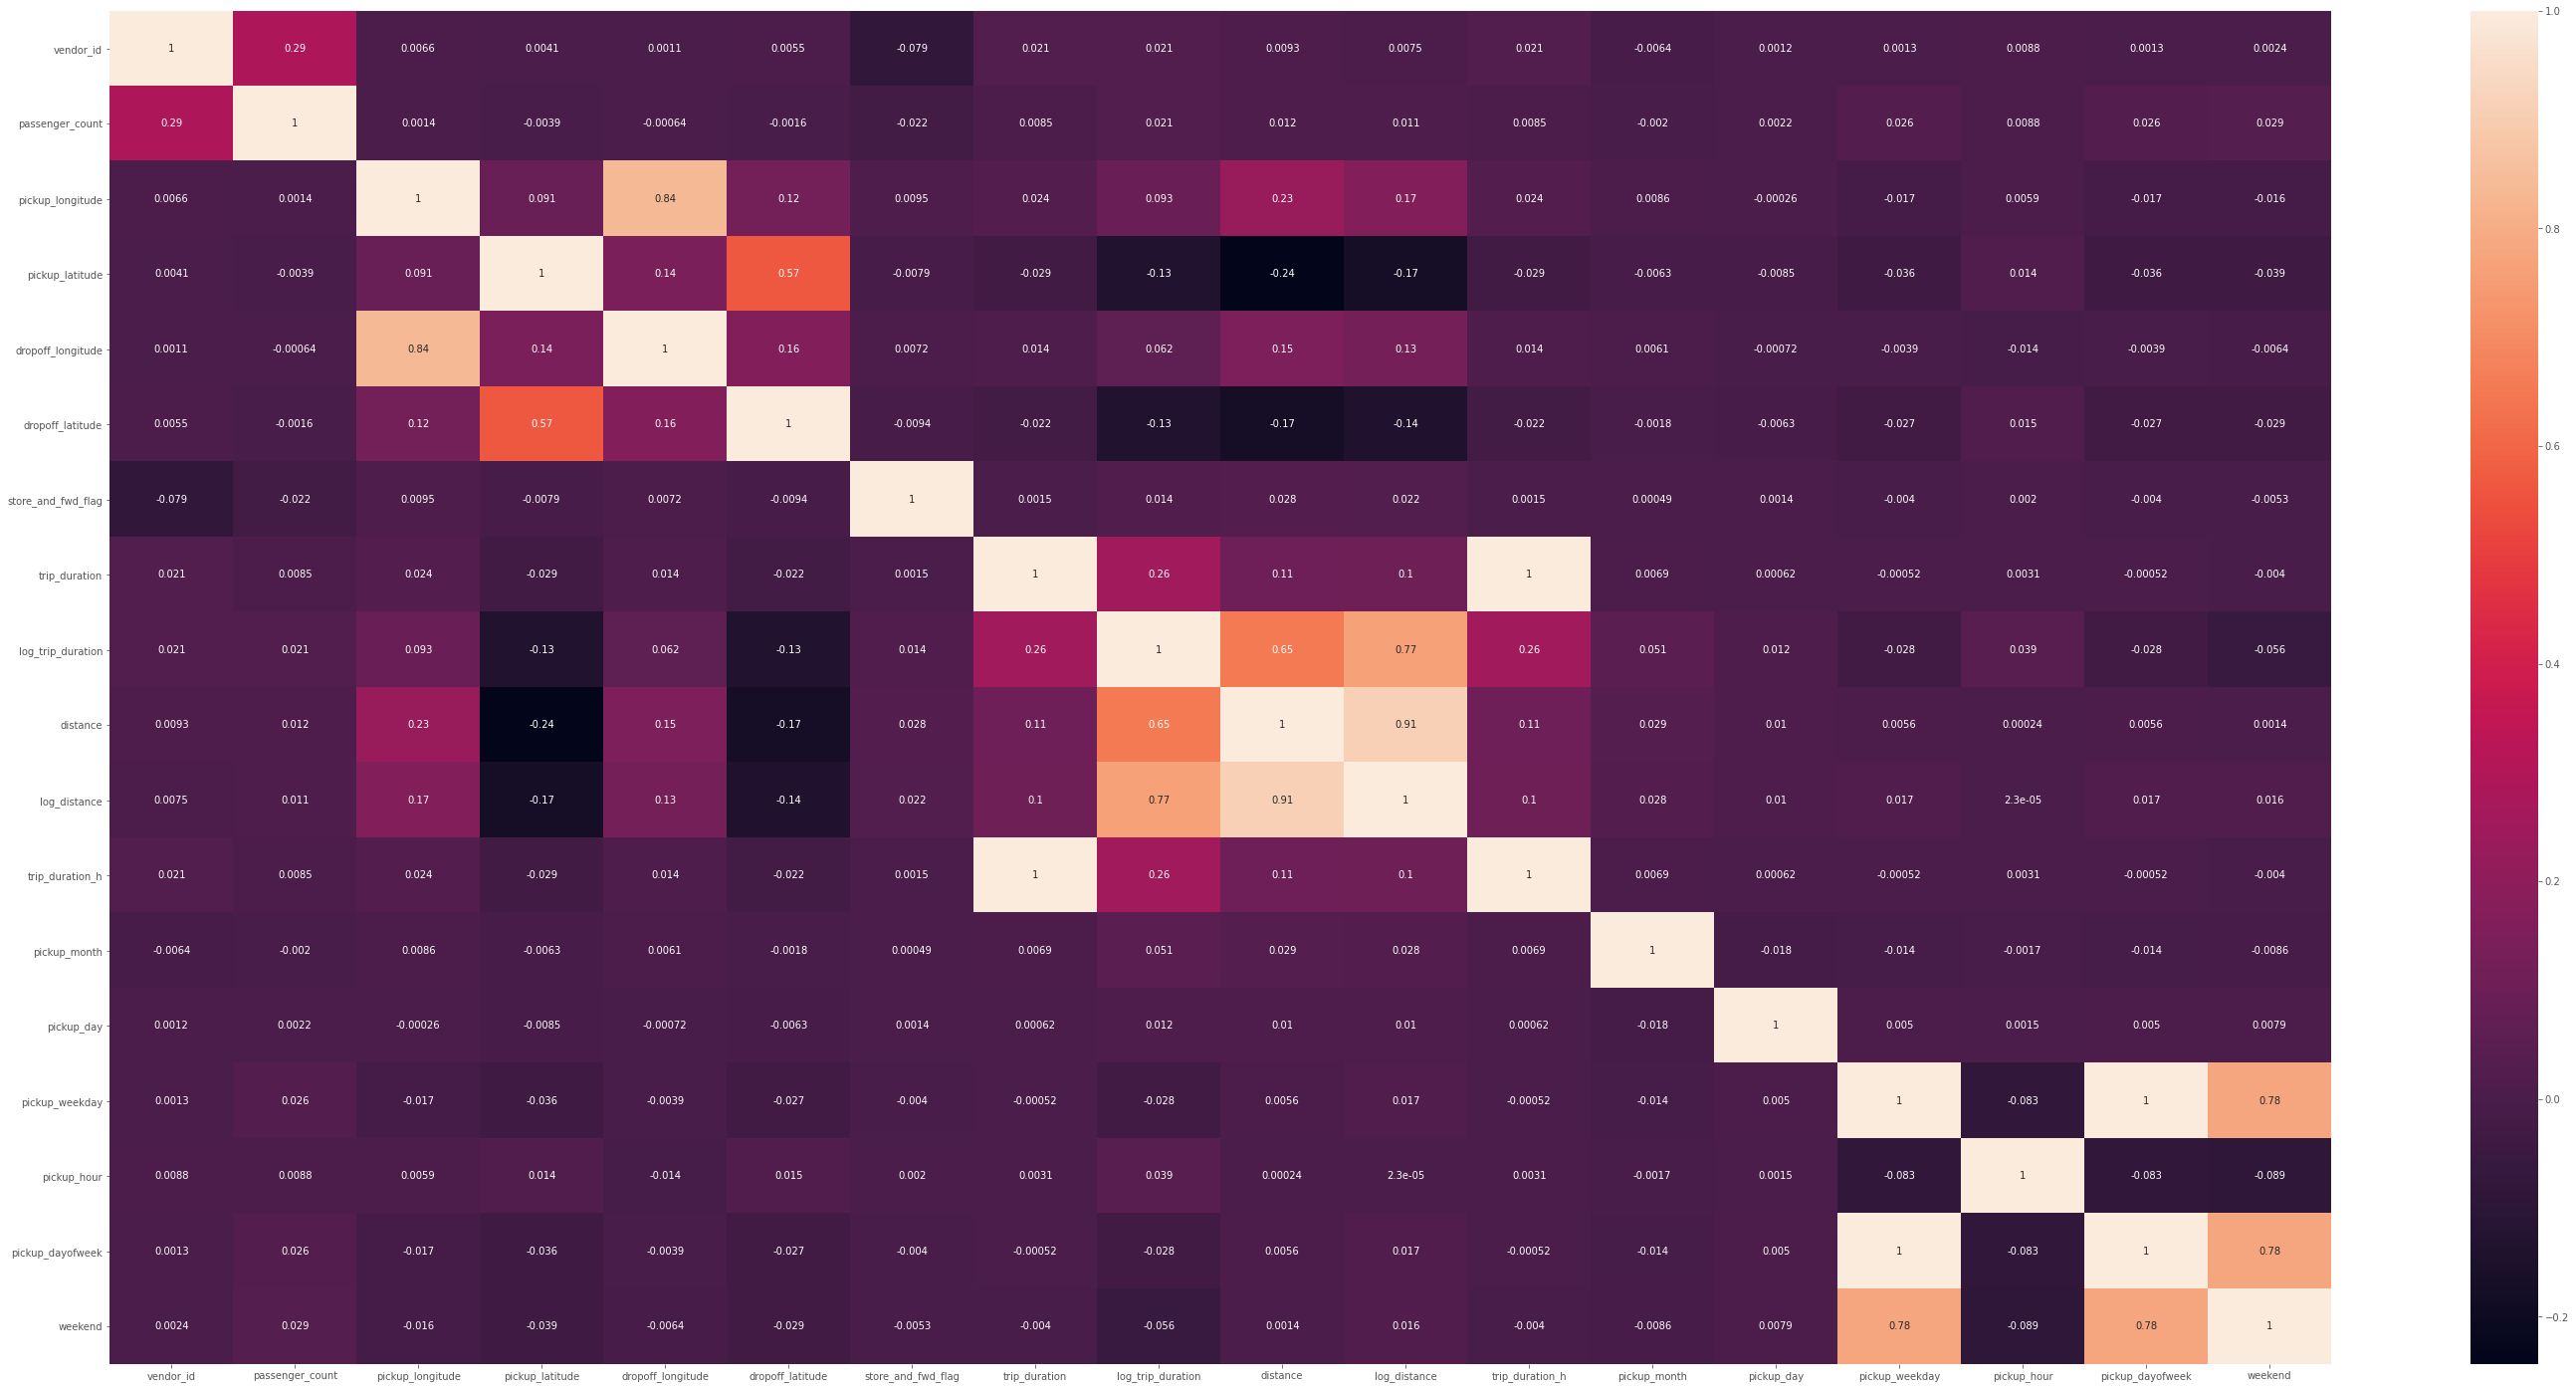

In [59]:
train_corr = train.corr()
fig, ax = plt.subplots(figsize = (50,25))
sns.heatmap(train_corr, annot = True)

target인 log_trip_duration 과 log_distance, distance 변수의 상관관계가 높은 것을 확인할 수 있습니다.

pickup의 위도경도와 dropoff의 위도 경도의 상관관계가 높습니다.

pickup_weekday와 pickup_daofweek의 상관관계가 높습니다.

변수들간의 상관관계가 높으면 다중공선성문제에 빠질수가 있습니다.


## 모델링

In [ ]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'log_trip_duration', 'distance', 'log_distance',
       'trip_duration_h', 'pickup_month', 'pickup_day', 'pickup_weekday',
       'pickup_hour', 'pickup_dayofweek', 'weekend'],
      dtype='object')

In [ ]:
data = train.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration', 'log_trip_duration', 'distance', 'pickup_dayofweek','trip_duration_h'], axis = 1)
target = train['log_trip_duration']

picup_datetime은 float이나 int형이 아니기 때문에 datetime중 필요한부분을 column으로 추가했기때문에 삭제했습니다.

dropoff_datetime은 target과 직접적인 연관이 있기때문에 넣어서 학습을 시키면 train은 다 맞추지만 test를 못맞추는 상황이 발생하기 때문에 삭제했습니다

tip_duration, log_trip_duration, trip_duration_h는  target변수이기 때문에 삭제했습니다.

distance는 log_distance 변수를 사용하기 때문에 삭제했습니다.

pickup_dayofweek는 pickup_weekday 변수와 같은 변수이기때문에 삭제했습니다.

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 62kB/s 


In [ ]:
from xgboost import  XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

## XGboost

In [ ]:
test = test.drop(['id', 'pickup_datetime', 'distance'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398987 entries, 0 to 1458643
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1398987 non-null  int64  
 1   passenger_count     1398987 non-null  int64  
 2   pickup_longitude    1398987 non-null  float64
 3   pickup_latitude     1398987 non-null  float64
 4   dropoff_longitude   1398987 non-null  float64
 5   dropoff_latitude    1398987 non-null  float64
 6   store_and_fwd_flag  1398987 non-null  int64  
 7   log_distance        1398987 non-null  float64
 8   pickup_month        1398987 non-null  int64  
 9   pickup_day          1398987 non-null  int64  
 10  pickup_weekday      1398987 non-null  int64  
 11  pickup_hour         1398987 non-null  int64  
 12  weekend             1398987 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 149.4 MB


In [ ]:
xgb = XGBRegressor()
xgb.fit(data, target)

[09:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.score(data, target)

0.6914701386789468

In [ ]:
xgb_pred = xgb.predict(test)

xgb_pred = pd.DataFrame(xgb_pred, columns = ['xgb_pred'])

# 로그화를 된 것을 예측을했기 때문에 다시 풀어주기위해 다음의 작업을 실행합니다.
xgb_pred = xgb_pred['xgb_pred'].apply(lambda x: np.exp(x)-1)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

In [ ]:
submission['trip_duration'] = xgb_pred

In [ ]:
submission

,id,trip_duration
0,id3004672,817.327802
1,id3505355,720.267000
2,id1217141,465.949744
3,id2150126,1209.187723
4,id1598245,328.161766
...,...,...
625129,id3008929,252.414395
625130,id3700764,1039.525006
625131,id2568735,1333.993866
625132,id1384355,2494.608925


In [ ]:
submission.to_csv("submission.csv", index_label=False, index = False)

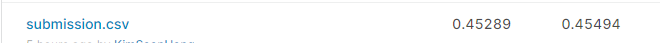

## 파라미터 최적화


파라미터 최적화를 위해 gridsearch cv를 사용하겠습니다.
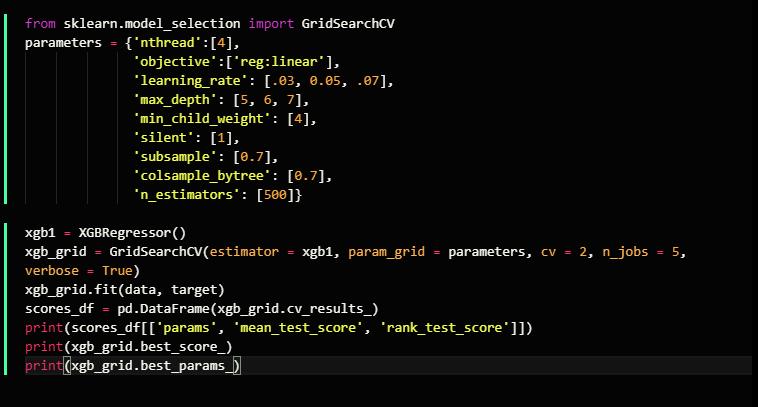

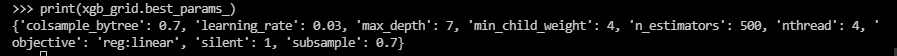


주어진 best_params_를 가지고 모델을 다시한번 돌려보겠습니다

In [ ]:
xgb = XGBRegressor(
    colsample_bytree = 0.7,
    learning_rate = 0.03,
    max_depth = 7,
    min_child_weight = 4,
    n_estimators = 500,
    nthread = 4,
    objective = 'reg:linear',
    silent = 1,
    subsample = 0.7
    )
xgb.fit(data, target)
print(xgb.score(data, target))
xgb_pred = xgb.predict(test)
xgb_pred = pd.DataFrame(xgb_pred, columns = ['xgb_pred'])
xgb_pred = xgb_pred['xgb_pred'].apply(lambda x: np.exp(x)-1)


0.7428252965104525


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
submission['trip_duration'] = xgb_pred
submission.to_csv("submission_xgb_gid.csv", index_label=False, index = False)

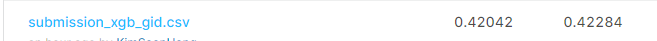

## LightGBM

In [ ]:
lgb = LGBMRegressor()
lgb.fit(data, target)
print(lgb.score(data, target))

lgb_pred = lgb.predict(test)
lgb_pred = pd.DataFrame(lgb_pred, columns = ['lgb_pred'])
lgb_pred = lgb_pred['lgb_pred'].apply(lambda x: np.exp(x)-1)

0.7213950584273857


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
submission['trip_duration'] = lgb_pred
submission.to_csv("submission_lgb.csv", index_label=False, index = False)

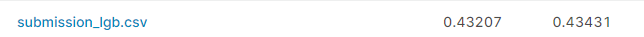

## CatBoost

In [ ]:
cat = CatBoostRegressor()
cat.fit(data, target)
print(cat.score(data, target))

cat_pred = cat.predict(test)
cat_pred = pd.DataFrame(cat_pred, columns = ['cat_pred'])
cat_pred = cat_pred['cat_pred'].apply(lambda x: np.exp(x)-1)

Learning rate set to 0.141695
0:	learn: 0.7199075	total: 364ms	remaining: 6m 3s
1:	learn: 0.6695259	total: 581ms	remaining: 4m 49s
2:	learn: 0.6277183	total: 788ms	remaining: 4m 21s
3:	learn: 0.5935382	total: 984ms	remaining: 4m 5s
4:	learn: 0.5664032	total: 1.19s	remaining: 3m 56s
5:	learn: 0.5449020	total: 1.4s	remaining: 3m 51s
6:	learn: 0.5272713	total: 1.6s	remaining: 3m 46s
7:	learn: 0.5131046	total: 1.81s	remaining: 3m 44s
8:	learn: 0.5012238	total: 2.02s	remaining: 3m 41s
9:	learn: 0.4918579	total: 2.24s	remaining: 3m 41s
10:	learn: 0.4847230	total: 2.45s	remaining: 3m 40s
11:	learn: 0.4786247	total: 2.65s	remaining: 3m 38s
12:	learn: 0.4735906	total: 2.86s	remaining: 3m 37s
13:	learn: 0.4697055	total: 3.07s	remaining: 3m 36s
14:	learn: 0.4664268	total: 3.26s	remaining: 3m 34s
15:	learn: 0.4636620	total: 3.47s	remaining: 3m 33s
16:	learn: 0.4614915	total: 3.68s	remaining: 3m 32s
17:	learn: 0.4593247	total: 3.88s	remaining: 3m 31s
18:	learn: 0.4572668	total: 4.09s	remaining: 3m 

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
submission['trip_duration'] = cat_pred
submission.to_csv("submission_cat.csv", index_label=False, index = False)

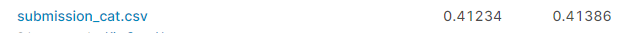

위의 3가지 모델중에서 catboost가 가장 좋은것으로 나타났습니다.
그이유는 모델 정확도가 가장높고, rmsle 점수가 가장 낮기때문입니다.

catboost에 gridsearchCV를 적용하여 모델에 적용해보겠습니다.
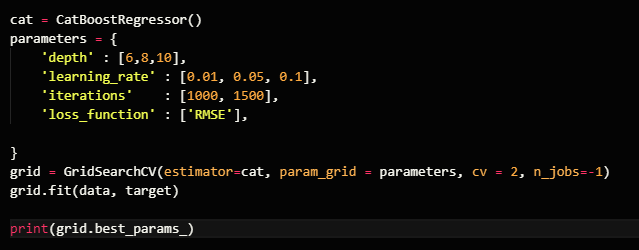

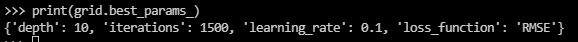

In [ ]:
cat = CatBoostRegressor(
    depth = 10,
    iterations = 1500,
    learning_rate = 0.1,
    loss_function = 'RMSE'
)
cat.fit(data, target)
print(cat.score(data, target))

cat_pred = cat.predict(test)
cat_pred = pd.DataFrame(cat_pred, columns = ['cat_pred'])
cat_pred = cat_pred['cat_pred'].apply(lambda x: np.exp(x)-1)

0:	learn: 0.7340840	total: 444ms	remaining: 11m 6s
1:	learn: 0.6928602	total: 847ms	remaining: 10m 34s
2:	learn: 0.6567192	total: 1.25s	remaining: 10m 25s
3:	learn: 0.6253893	total: 1.66s	remaining: 10m 22s
4:	learn: 0.5987236	total: 2.07s	remaining: 10m 18s
5:	learn: 0.5757439	total: 2.48s	remaining: 10m 18s
6:	learn: 0.5559342	total: 2.9s	remaining: 10m 19s
7:	learn: 0.5391240	total: 3.31s	remaining: 10m 18s
8:	learn: 0.5248061	total: 3.73s	remaining: 10m 18s
9:	learn: 0.5125636	total: 4.14s	remaining: 10m 17s
10:	learn: 0.5020517	total: 4.56s	remaining: 10m 17s
11:	learn: 0.4933714	total: 4.96s	remaining: 10m 14s
12:	learn: 0.4859463	total: 5.37s	remaining: 10m 13s
13:	learn: 0.4793411	total: 5.78s	remaining: 10m 13s
14:	learn: 0.4738657	total: 6.19s	remaining: 10m 12s
15:	learn: 0.4692427	total: 6.61s	remaining: 10m 12s
16:	learn: 0.4651727	total: 7.01s	remaining: 10m 11s
17:	learn: 0.4616137	total: 7.43s	remaining: 10m 11s
18:	learn: 0.4587114	total: 7.84s	remaining: 10m 11s
19:	l

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
submission['trip_duration'] = cat_pred
submission.to_csv("submission_cat_grid2.csv", index_label=False, index = False)

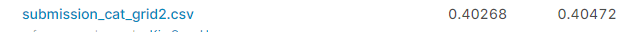

## feature_importance

In [ ]:
cat.get_feature_importance

<bound method CatBoost.get_feature_importance of <catboost.core.CatBoostRegressor object at 0x7f2c6b1177d0>>

In [ ]:
cat.feature_importances_

array([2.10506875e+00, 7.90193560e-01, 8.61501216e+00, 7.44247196e+00,
       9.18424315e+00, 1.15903868e+01, 2.05358475e-02, 3.36250770e+01,
       3.09938355e+00, 3.20311139e+00, 4.27049498e+00, 1.39374630e+01,
       2.11655791e+00])

In [ ]:
data_feature = []
for i in zip(data.iloc[:,:-1], cat.feature_importances_) :
  data_feature.append(i)

In [ ]:
data_feature

[('vendor_id', 2.105068745040369),
 ('passenger_count', 0.7901935595266111),
 ('pickup_longitude', 8.615012156735904),
 ('pickup_latitude', 7.4424719582913195),
 ('dropoff_longitude', 9.184243145268693),
 ('dropoff_latitude', 11.590386755104715),
 ('store_and_fwd_flag', 0.020535847485962853),
 ('log_distance', 33.62507701905759),
 ('pickup_month', 3.0993835543705663),
 ('pickup_day', 3.203111393477441),
 ('pickup_weekday', 4.270494980531695),
 ('pickup_hour', 13.937462976505337)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

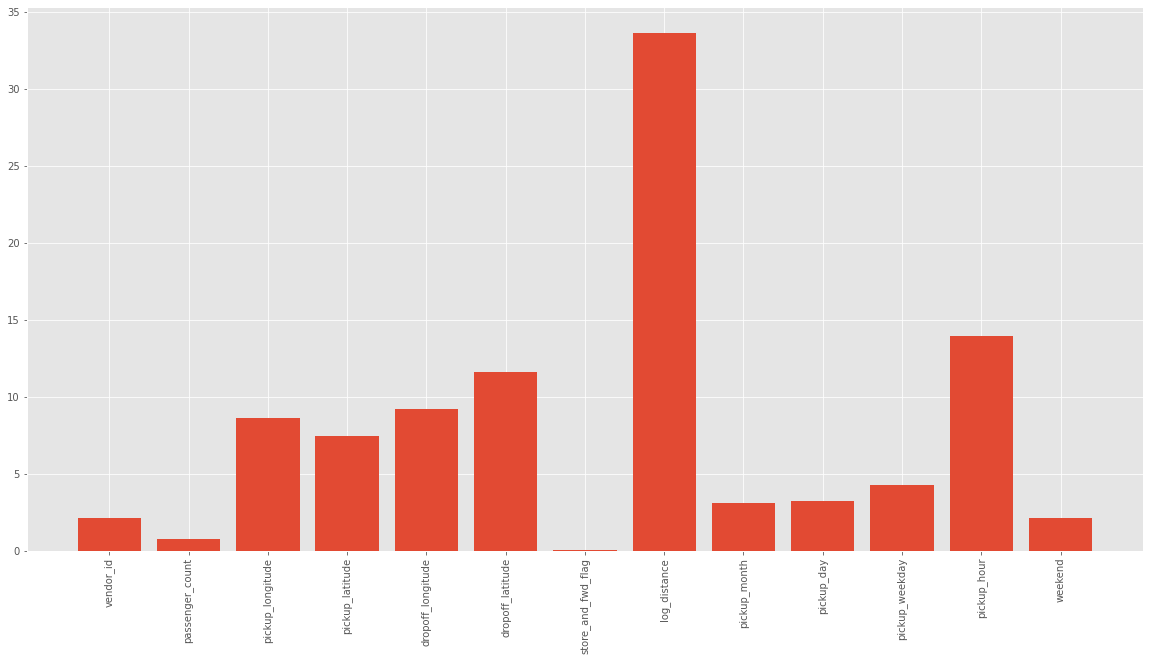

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(data.columns, cat.feature_importances_)
plt.xticks(rotation = 90)

모델이 log_distance에 영향을 많이 받는것을 확인할 수 있습니다. 또한 store_and_fwd_flag는 중요도가 매우 낮은것으로 보입니다.

## OLS

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(data)
y = target

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                            OLS Regression Results                            
Dep. Variable:      log_trip_duration   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                 1.588e+05
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        10:07:25   Log-Likelihood:            -1.0068e+06
No. Observations:             1398987   AIC:                         2.014e+06
Df Residuals:                 1398973   BIC:                         2.014e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.3594      0

R-squared 값은 0이면 회귀모형의 설명력이 낮고 1이면 회귀모형의 설명력이 높습니다.

R-square 값이 0.596으로 어느정도 설명력을 갖고있다고 볼수있습니다.